### Importing modules

---



In [18]:
import tensorflow
import cv2
import numpy as np 
import matplotlib.pyplot as plt


In [19]:
image_path = 'C:/Users/rauna/JupyterNotebooks/AImedical/MontgomerySet/MontgomerySet/CXR_png/'
#image_files = os.listdir(image_directory)

In [20]:
image = cv2.imread(image_path)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
imagedata_generator = ImageDataGenerator(rescale=1/1, validation_split=0.2)

In [23]:
train_data_generator = imagedata_generator.flow_from_directory(
  directory = image_path,
  shuffle=True,
  subset='training',
  target_size = (100,100),
  batch_size = 32,
  class_mode = 'binary',
  seed = 1
)

Found 111 images belonging to 2 classes.


In [24]:
test_data_generator = imagedata_generator.flow_from_directory(
  directory = image_path,
  shuffle=True,
  subset='validation',
  target_size = (100,100),
  batch_size = 32,
  class_mode = 'binary',
  seed = 1
)

Found 27 images belonging to 2 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [26]:
model = Sequential(
    [
        Conv2D(16, (3,3), activation = MaxPool2D(2,2)),
        Conv2D(32, (3,3), activation = MaxPool2D(2,2)),
        Conv2D(16, (3,3), activation = MaxPool2D(2,2)),
        Flatten(),
        Dense(512, activation = 'relu'),
        Dense(1, activation= 'sigmoid')
    ]
)

In [27]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [28]:
model.fit(
    train_data_generator,
    batch_size = 32, 
    epochs = 50,
    validation_data= test_data_generator
)

Epoch 1/50
4/4 [==============================] - 36s 11s/step - loss: 680.9489 - accuracy: 0.4865 - val_loss: 169.5263 - val_accuracy: 0.5926
Epoch 2/50
4/4 [==============================] - 30s 8s/step - loss: 151.0977 - accuracy: 0.4955 - val_loss: 41.4919 - val_accuracy: 0.5926
Epoch 3/50
4/4 [==============================] - 28s 7s/step - loss: 30.3664 - accuracy: 0.5135 - val_loss: 10.3342 - val_accuracy: 0.4815
Epoch 4/50
4/4 [==============================] - 28s 7s/step - loss: 8.6000 - accuracy: 0.5135 - val_loss: 5.5620 - val_accuracy: 0.4815
Epoch 5/50
4/4 [==============================] - 28s 7s/step - loss: 8.9771 - accuracy: 0.5225 - val_loss: 3.1079 - val_accuracy: 0.5556
Epoch 6/50
4/4 [==============================] - 28s 7s/step - loss: 1.2704 - accuracy: 0.8288 - val_loss: 3.3400 - val_accuracy: 0.5556
Epoch 7/50
4/4 [==============================] - 29s 8s/step - loss: 5.9237 - accuracy: 0.6486 - val_loss: 4.1237 - val_accuracy: 0.6667
Epoch 8/50
4/4 [========

In [29]:
import numpy as np

In [30]:
predictions = np.array([])
actual = np.array([])

for i in range(1):
  imgs, labels = list(test_data_generator[i])

  predictions = np.concatenate(
      [
          predictions,
       (np.concatenate(model.predict(imgs)) >=0.5).astype('int32'),
      ]
  )
  actual = np.concatenate([actual,labels])


1/1 [==============================] - 0s 484ms/step


In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
dis = ConfusionMatrixDisplay( confusion_matrix(actual, predictions))

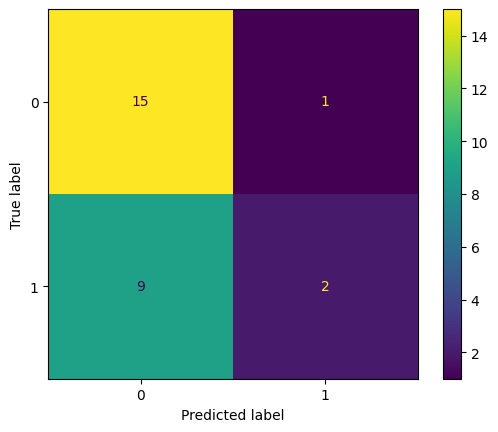

In [33]:
dis.plot()